In [1]:
# to learn about the prediction of gthe machine learning model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# impoting the data set
df=pd.read_csv('Exp-5 House Price.csv')

In [3]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [4]:
df.drop(df[df['Area']>3000].index,inplace=True)

In [5]:
plt.figure(figsize=(14,7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

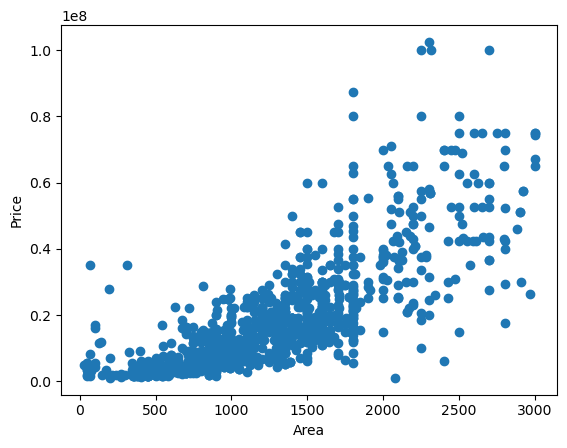

In [6]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.Area,df.Price)

In [8]:
# df.corr()

In [9]:
# importing the encoder and encoding the required fields
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [13]:
df['Furnishing'] = lb.fit_transform(df['Furnishing'])
df['Locality'] = lb.fit_transform(df['Locality'])
df['Status'] = lb.fit_transform(df['Status'])
df['Transaction'] = lb.fit_transform(df['Transaction'])
df['Type'] = lb.fit_transform(df['Type'])


In [14]:
df1=df.dropna()

In [15]:
df1

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Tye
1,750.0,2,2.0,1,136,1.0,5000000,1,0,0,6667.0,0
2,950.0,2,2.0,0,48,1.0,15500000,1,1,0,6667.0,0
3,600.0,2,2.0,1,275,1.0,4200000,1,1,1,6667.0,1
4,650.0,2,2.0,1,276,1.0,6200000,1,0,1,6667.0,1
5,1300.0,4,3.0,1,275,1.0,15500000,1,0,1,6667.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3,3.0,1,213,1.0,26000000,1,1,1,12916.0,1
1253,1200.0,3,3.0,1,43,1.0,16500000,1,1,1,12916.0,1
1255,1050.0,3,2.0,1,43,3.0,12500000,1,1,1,12916.0,1
1256,875.0,3,3.0,1,43,3.0,17500000,1,0,1,12916.0,1


In [16]:
df1.describe()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Tye
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000
mean,1202.590934,2.692553,2.443617,1.152128,186.487234,1.661702,1.760809e+07,0.945745,0.617021,0.535106,14481.082979,0.535106
std,637.367941,0.893801,0.964775,0.650424,102.175166,3.312998,1.719176e+07,0.226641,0.486372,0.499032,18593.845532,0.499032
min,28.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+06,0.000000,0.000000,0.000000,1667.000000,0.000000
25%,750.000000,2.000000,2.000000,1.000000,113.000000,1.000000,5.000000e+06,1.000000,0.000000,0.000000,6154.000000,0.000000
50%,1100.000000,3.000000,2.000000,1.000000,176.000000,1.000000,1.250000e+07,1.000000,1.000000,1.000000,10590.500000,1.000000
75%,1600.000000,3.000000,3.000000,2.000000,275.000000,2.000000,2.472500e+07,1.000000,1.000000,1.000000,17181.250000,1.000000
max,3000.000000,7.000000,6.000000,2.000000,357.000000,39.000000,1.025000e+08,1.000000,1.000000,1.000000,183333.000000,1.000000


In [17]:
df['Per_Sqft'].isnull().sum()

237

In [18]:
df['Parking'].fillna(int(df['Parking'].mode()),inplace=True)

C:\Users\Vasudev\AppData\Local\Temp\ipykernel_392\1040940465.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Parking'].fillna(int(df['Parking'].mode()),inplace=True)


In [19]:
X=df1[['Area','BHK','Bathroom','Furnishing','Locality','Parking','Status','Transaction','Type']]
y=df1['Price']

In [21]:
import numpy as np
from sklearn import model_selection

In [22]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,y,test_size=0.3)

In [23]:
lr=LinearRegression()

In [24]:
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [26]:
print(f"Accuracy of Test Data is {round(lr.score(X_test, Y_test)*100,2)}%")
print(f"Accuracy of Training Data is {round(lr.score(X_train, Y_train)*100,2)}%")

Accuracy of Test Data is 65.43%
Accuracy of Training Data is 69.8%


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))

10619580.034161923


In [31]:
print(mean_absolute_error(Y_test,Y_pred))

6976753.170055358


# Boston Houses Dataset

In [34]:
 from sklearn import datasets

In [36]:
boston = datasets.load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('HousingData.csv')

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
X=df.iloc[:,-1]

In [9]:
X

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [10]:
Y=df.iloc[:,:-1]

In [11]:
Y

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [12]:
X.shape

(506,)

In [13]:
Y.shape

(506, 13)

In [14]:
# if we have to  find the mean for a particulr column so we will find the mean across axis=0
u=np.mean(Y,axis=0)
std=np.std(Y,axis=0)

In [15]:
u

CRIM         3.611874
ZN          11.211934
INDUS       11.083992
CHAS         0.069959
NOX          0.554695
RM           6.284634
AGE         68.518519
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.715432
dtype: float64

In [16]:
std

CRIM         8.711216
ZN          23.364801
INDUS        6.828860
CHAS         0.255078
NOX          0.115763
RM           0.701923
AGE         27.970692
DIS          2.103628
RAD          8.698651
TAX        168.370495
PTRATIO      2.162805
B           91.204607
LSTAT        7.148505
dtype: float64

In [17]:
#Normalisation of the data
Y=(Y-u)/std

In [18]:
#Normalised data
Y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.413898,0.290525,-1.284840,-0.274265,-0.144217,0.413672,-0.118643,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.082105
1,-0.411488,-0.479864,-0.587798,-0.274265,-0.740262,0.194274,0.371156,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.500165
2,-0.411491,-0.479864,-0.587798,-0.274265,-0.740262,1.282714,-0.265225,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.215000
3,-0.410908,-0.479864,-1.303877,-0.274265,-0.835284,1.016303,-0.812226,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.367479
4,-0.406697,-0.479864,-1.303877,-0.274265,-0.835284,1.228577,-0.511911,1.077737,-0.752922,-1.106115,0.113032,0.441052,NaN


In [19]:
#plot X vs any feature for the data visualisation

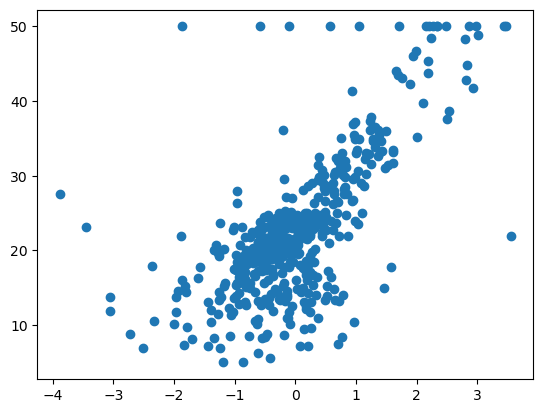

In [20]:
# import matplotlib.pyplot as plt
plt.scatter(Y.iloc[:,5],X)
plt.show()

# implementation on problem boston housing dataset
Linear regression on multiple features

In [21]:
X.shape

(506,)

In [22]:
Y.shape

(506, 13)

In [25]:
import numpy as np
ones=np.ones((Y.shape[0],1))
Y=np.hstack((ones,Y))
print(Y.shape)

(506, 14)


In [26]:
Y[:4,:4]

array([[ 1.        , -0.4138979 ,  0.2905253 , -1.28483988],
       [ 1.        , -0.41148837, -0.47986431, -0.58779822],
       [ 1.        , -0.41149066, -0.47986431, -0.58779822],
       [ 1.        , -0.41090751, -0.47986431, -1.30387674]])

In [41]:
import numpy as np

# X-Matrix(mXn m example containing n features)
# Y Vector(Single example with n features)
def hypothesis(x, theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_ += (theta[i] * x[i])
    return y_

def error(X,Y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        e += (Y[i] - y_)**2
    return e / m

def gradient(X, Y, theta):
    m, n = X.shape
    grad = np.zeros((n,))
    # for all values of j
    for j in range(n):
        for i in range(m):
            # sum over all examples
            y_ = hypothesis(X[i], theta)
            grad[j] += (y_ - Y[i]) * X[i][j]
    return grad / m
    
def gradient_descent(X, Y, learning_rate=0.1, max_epochs=300):
    m, n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X, Y, theta)
        error_list.append(e)
        
        grad = gradient(X, Y, theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate * grad[j]
    return theta, error_list

In [48]:
import time
start=time.time()
theta,error_list=gradient_descent(Y,X)
end=time.time()
print("Time taken is",end)

Time taken is 1710688847.9899728


In [49]:
print(theta)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


In [50]:
print(error_list)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [52]:
# Now computing the r2 score
y_=[]
m=X.shape[0]
for i in range(m):
    pred=hypothesis(X[i],theta)
    y_.append(pred)
y_=np.array(y_)

IndexError: tuple index out of range

In [ ]:
def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score(1-num/denom)
    return score*100

In [53]:
Y.shape

(506, 14)

In [54]:
X.shape

(506,)

# Section-3 Optimizing Code using Vectorization

An Efficent implementation for linear regression using vectorization
   Avoid loop in the implementation except gradient descent main loop
   Use numpy function like np.sum(),np.dot() which are quite fast and already optimised

In [74]:
def hypothesis(X,theta):
    return np.dot(X,theta)
def error(X,y,theta):
    error
    m=X.shape[0]
    y_=hypothesis(X,theta)
    e=np.sum((y-y_)**2)
    
    return e/m
def gradient(X,y,theta):
    y_=hypothesis(X,theta)
    grad=np.dot(X.T,(y-y_))
    m=X.shape[0]
    
    return grad/m
def gradient_descent(X, y, learning_rate=0.1, max_iters=300):
    n = X.shape[1]  # Number of features
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        grad = gradient(X, y, theta)
        theta = theta - learning_rate * grad
        
        # Compute and append error
        err = error(X, y, theta)
        error_list.append(err)
        
    return error_list, theta



In [75]:

error_list,theta=gradient_descent(Y,X)


In [73]:
print(error_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [65]:
print(theta)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
